## Muestreo y Reconstrucción

Considerando que:

- Los [Procesadores Digitales de Señales](https://en.wikipedia.org/wiki/Digital_signal_processor) y los demás proccesadores solo pueden realizar operaciones matemáticas con una cantidad limitada de valores.

- Las señales tratadas hasta el momento son continuas en tiempo y amplitud.

- Las señales continuas no podrían ser trabajadas en procesadores.

Debe encontrarse una manera de "traducir" la información de las señales continuas de manera que puedan ser operadas por procesadores.

El muestreo y la cuantización son los procesos que se encargan de tal "traducción". El [*Muestreo*](https://en.wikipedia.org/wiki/Sampling_%28signal_processing%29) es el proceso de extraer las amplitudes de señales continuas solamente en algunos instantes. La [*cuantización*](https://en.wikipedia.org/wiki/Quantization_%28signal_processing%29) es el proceso de mapear los valores continuos a una cantidad limitada de símbolos que se define por los bits del procesador. Finalmente, las señales muestreadas y cuantizadas se conocen como **señales digitales**


![Muestreo y Cuantización](analog_discrete_digital.png)


### Muestreo ideal

Una señal continua $x(t)$ se muestrea tomando los valores de amplitud en algunos instantes, generalmente equidistantes en el tiempo. Esto puede modelarse como la multiplicación de la señal $x(t)$ con un tren de impulsos de Dirac, sin embargo es solamente un modelo dada la imposibilidad de generar impulsos de Dirac.

Suponiendo un muestreo con intervalos constantes $T$, la señal muestreada $x_\text{s}(t)$ se representa como:


\begin{equation}
x_\text{s}(t) = \sum_{k = - \infty}^{\infty} x(t) \cdot \delta(t - k T) = \sum_{k = - \infty}^{\infty} x(k T) \cdot \delta(t - k T)
\end{equation}

Así, la señal muestreada corresponde a una serie de impulsos de Dirac pesados mediante las amplitudes de la señal $x(t)$. 

![Ideal sampling of signals](figuras/ideal_sampling.png)

La multiplicación de la señal con el tren de impulsos de Dirac puede representarse como:

\begin{equation}
x_\text{s}(t) = x(t) \cdot \frac{1}{T} {\bot \!\! \bot \!\! \bot} \left( \frac{t}{T} \right)
\end{equation}

Las mueestras $x(k T)$ para $k \in \mathbb{Z}$ de la señal de tiempo continuo es la [señal de tiempo discreto](https://en.wikipedia.org/wiki/Discrete-time_signal) $x[k] := x(k T)$.

¿Siempre puede $x[k]$ representar a $x(t)$?.

### Espectro de una señal muestreada

Se obtiene el espectro $X_\text{s}(j \omega) = \mathcal{F} \{ x_\text{s}(t) \}$ de la señal muestreada $x_\text{s}(t)$ mediante la transformada de Fourier.

\begin{equation}
x_\text{s}(t) = x(t) \cdot \frac{1}{T} {\bot \!\! \bot \!\! \bot} \left( \frac{t}{T} \right)
\end{equation}

\begin{equation}
\begin{split}
X_\text{s}(j \omega) &= \frac{1}{2 \pi} X(j \omega) * {\bot \!\! \bot \!\! \bot} \left( \frac{\omega}{\omega_\text{s}} \right) \\
&= \frac{1}{2 \pi} X(j \omega) * \frac{2 \pi}{T} \sum_{\mu = - \infty}^{\infty} \delta(\omega - \mu \omega_\text{s}) \\
&= \frac{1}{T} \sum_{\mu = - \infty}^{\infty} X \left(j (\omega - \mu \omega_\text{s}) \right)
\end{split}
\end{equation}

donde $\omega_\text{s} = 2 \pi \, f_\text{s}$ es la frecuencia angular de muestreo y $f_\text{s} = \frac{1}{T}$ es la frecuencia de muestreo.



El espectro resultante $X_\text{s}(j \omega) $ resulta ser una réplica del espectro $X(j \omega)$  se repite cada $\omega_\text{s}$, es decir que el muestreo periódico de una señal genera espectros periódicos (en el dominio de la frecuencia).

Suponga una señal $x(t)$ que tiene solamente con bajas frecuencias. El espectro $X(j \omega)$ es:

\begin{equation}
X(j \omega) = 0 \qquad \text{for } |\omega| > \omega_\text{u}
\end{equation}

donde $\omega_\text{u}$ es la frecuencia límite a partir de la cual no hay componentes. La siguiente gráfica es un ejemplo del espectro mencionado.

![Spectrum of continuous low-pass signal](figuras/spectrum_lowpass_signal.png)

Como el espectro de la señal muestrada $X_\text{s}(j \omega)$ es periódico y se repite cada $\omega_text{s}$, este corresponde a una superposición de espectros desplazados cada $\omega_text{s}$, como se muestra en la siguiente gráfica.


![Spectrum of sampled low-pass signal](figuras/spectrum_sampled_signal.png)

Observe que si $\frac{\omega_\text{s}}{2} > \omega_\text{u}$ los espectros repetidos no se traslapan y los valores no se alterarían, es decir, la señal está bien muestreada.

### Reconstrucción

Si se cumple que $\omega_\text{u} < \frac{\omega_\text{s}}{2}$, puede recuperarse el espectro $X(j \omega)$ al tomar solamente la porción central de $X_\text{s}(j \omega)$. Esto es equivalente a aplicar un filtro pasa bajas ideal de frecuencia $\omega_\text{s}$ a la señal muestreada, como se muestra a continuación.


![Ideal reconstruction of a sampled low-pass signal](figuras/ideal_reconstruction.png)

- La linea azul representa el espectro de la señal muestreada.
- La linea roja representa el espectro del filtro pasa bajas ideal.

La función de transferencia $H(j \omega)$ del filtro en mención es:


\begin{equation}
H(j \omega) = T \cdot \text{rect} \left( \frac{\omega}{\omega_\text{s}} \right)
\end{equation}

Su respuesta impulsional (dominio del tiempo) se obtiene mediante la transformada inversa de Fourier.

\begin{equation}
h(t) = \text{sinc} \left( \frac{\pi t}{T} \right)
\end{equation}

Así, la señal reconstruida $y(t)$ es el resultado de la convolución entre dicha respuesta impulsional y el tren de pulsos de la señal muestreada.

\begin{align}
y(t) &= x_\text{s}(t) * h(t) \\
&= \left( \sum_{k = - \infty}^{\infty} x(k T) \cdot \delta(t - k T) \right) * \text{sinc} \left( \frac{\pi t}{T} \right) \\
&= \sum_{k = - \infty}^{\infty} x(k T) \cdot \text{sinc} \left( \frac{\pi}{T} (t - k T) \right)
\end{align}

Así, la señal reconstruida $y(t)$ es una superposición de señales sinc desplazadas y ponderadas por los valores muestreados. Esto se ilustra a continuación.

![Interpolation of sampled signal by sinc function](figuras/sinc_interpolation.png)



### Aliasing

Si no se cumple con el criterio $\frac{\omega_\text{s}}{2} > \omega_\text{u}$, los espectros repetidos se traslapan y cambian sus valores, lo cual hace que el espectro de la parte central cambie y por consiguiente la señal reconstruida no sea la original.

![Aliasing](figuras/aliasing.png)

Este fenómeno recibe el nombre de **aliasing** dado que hace referencia a señales de alta frecuencia que cambian su aspecto por señales de baja frecuencia.

### Teorema de muestreo

También conocido como [*Teorema de Nyquist–Shannon*](https://en.wikipedia.org/wiki/Nyquist%E2%80%93Shannon_sampling_theorem). Dada una señal $x(t)$ de componentes frecuenciales bajas y limitadas por $\omega_\text{c}$, se puede reconstruir a partir de muestras cuya frecuencia angular sea $\omega_\text{s}$ si cumple que

\begin{equation}
\omega_\text{s} \geq 2 \cdot \omega_\text{c}
\end{equation}

Esto indica que la frecuencia de muestreo debe seleccionarse según la aplicación y el tipo de señales propias de la misma de manera que sea al menos el doble de la máxima frecuencia presente en las señales.

* sobremuestreo $\omega_\text{s} > 2 \cdot \omega_\text{c}$
* muestreo crítico $\omega_\text{s} = 2 \cdot \omega_\text{c}$
* submuestreo $\omega_\text{s} < 2 \cdot \omega_\text{c}$

Para aplicaciones reales se escoge una frecuencia de muestreo por encima del doble.


### Ejemplo: Muestreo y Reconstrucción de una señal coseno

Suponga una señal de tiempo continuo $x(t) = \cos(\omega_0 t)$.

Se  define una función para tomar muestras y otra para reconstruir.

In [1]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
sym.init_printing()

t = sym.symbols('t', real=True)
k = sym.symbols('k', integer=True)


def ideal_sampling(x, k, w_s):
    kappa = sym.symbols('kappa')
    xs = sym.lambdify(kappa, x.subs(t, kappa * 2 * sym.pi / w_s))
    return [xs(kappa) for kappa in k]


def ideal_reconstruction(xs, k, w_s):
    T = 2*sym.pi/w_s
    return sum(xs[n] * sym.sinc(sym.pi / T * (t - k[n] * T)) for n in range(len(k)))

Y otra función para graficar señales.

In [2]:
def plot_signals(xs, y, w_s, k):

    plt.stem(k*2*np.pi/w_s, xs)
    plt.xlabel('$t$ in s')
    plt.ylabel('$x_s[k] = x_s(kT)$')
    plt.axis([0, 5, -1.2, 1.2])

    sym.plot(y, (t, 0, 5), xlabel='$t$', ylabel='$y(t)$', ylim=(-1.2, 1.2))

Ahora se define $x(t) = \cos(\omega_0 t)$ con $\omega_0 = 5$.

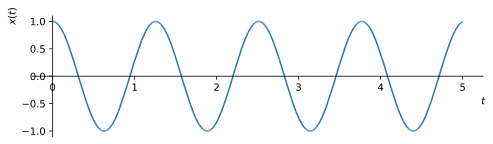

In [3]:
w_0 = 5
x = sym.cos(w_0 * t)


plt.rcParams['figure.figsize'] = 7, 2
sym.plot(x, (t, 0, 5), xlabel=r'$t$', ylabel=r'$x(t)$')

Si la frecuencia de muestreo $\omega_\text{s} > 2 \cdot \omega_0$, la señal está bien muestreada.

Ejemplo con $\omega_\text{s} = 50$

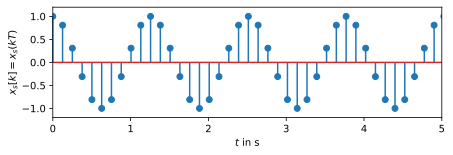

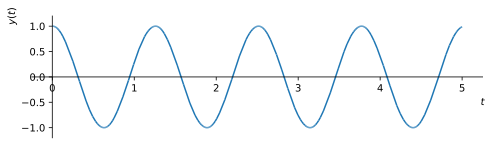

In [4]:
k = np.arange(-100, 100)

w_s = 50
xs = ideal_sampling(x, k, w_s)
y = ideal_reconstruction(xs, k, w_s)

plt.rcParams['figure.figsize'] = 7, 2
plot_signals(xs, y, w_s, k)

Si la frecuencia de muestreo $\omega_\text{s} = 2 \cdot \omega_0$, la señal está muestreada en el límite del teorema.

Ejemplo con $\omega_\text{s} = 10$


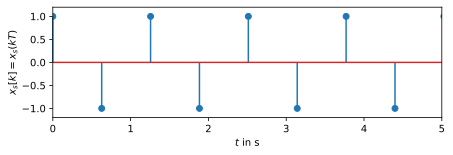

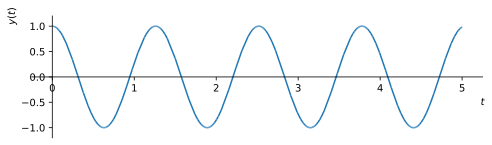

In [5]:
w_s = 10
xs = ideal_sampling(x, k, w_s)
y = ideal_reconstruction(xs, k, w_s)

plt.rcParams['figure.figsize'] = 7, 2
plot_signals(xs, y, w_s, k)

Si la frecuencia de muestreo $\omega_\text{s} < 2 \cdot \omega_0$, la señal está mal muestreada.

Ejemplo con $\omega_\text{s} = 7$


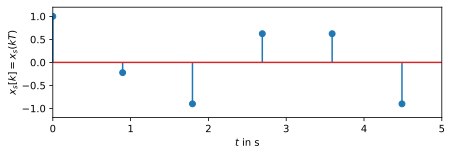

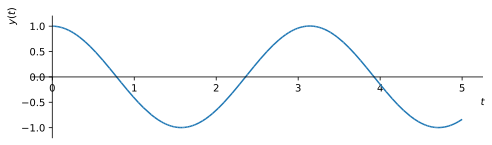

In [6]:
w_s = 7
xs = ideal_sampling(x, k, w_s)
y = ideal_reconstruction(xs, k, w_s)

plt.rcParams['figure.figsize'] = 7, 2
plot_signals(xs, y, w_s, k)

¿Qué pasa si $x(t) = \cos(5 t + 1.5)$?

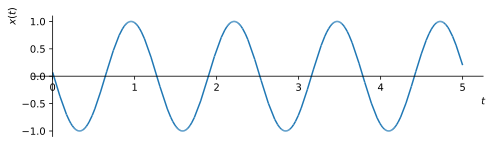

In [7]:
w_0 = 5
x = sym.cos(w_0 * t + 1.5)


plt.rcParams['figure.figsize'] = 7, 2
sym.plot(x, (t, 0, 5), xlabel=r'$t$', ylabel=r'$x(t)$')

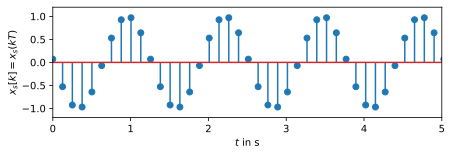

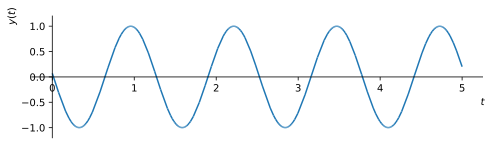

In [8]:
k = np.arange(-100, 100)

w_s = 50
xs = ideal_sampling(x, k, w_s)
y = ideal_reconstruction(xs, k, w_s)

plt.rcParams['figure.figsize'] = 7, 2
plot_signals(xs, y, w_s, k)

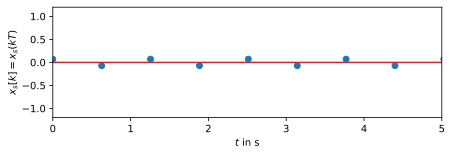

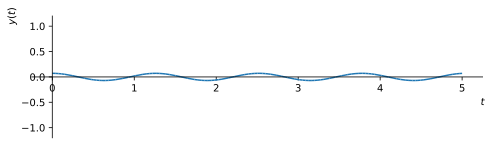

In [9]:
w_s = 10
xs = ideal_sampling(x, k, w_s)
y = ideal_reconstruction(xs, k, w_s)

plt.rcParams['figure.figsize'] = 7, 2
plot_signals(xs, y, w_s, k)

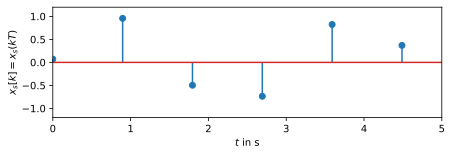

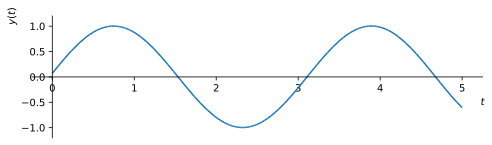

In [10]:
w_s = 7
xs = ideal_sampling(x, k, w_s)
y = ideal_reconstruction(xs, k, w_s)

plt.rcParams['figure.figsize'] = 7, 2
plot_signals(xs, y, w_s, k)

**Ejercicio para entregar en pareja** (esta vez sí en pareja)

- Analice el espectro de la señal $x(t) = cos(5t) + 0.7cos(7t)$.

- Cuál es la frecuencia más alta de $x(t)$.

- Defina una frecuencia para submuestreo $\omega_\text{sub}$.

- Defina una frecuencia para muestreo crítico $\omega_\text{cri}$.

- Defina una frecuencia para sobremuestreo $\omega_\text{sob}$.

- Con cada frecuencia definida ($\omega_\text{sub}$, $\omega_\text{cri}$ y $\omega_\text{sob}$), muestree la señal $x(t)$ para encontrar las señales en tiempo discreto $x_{\omega_\text{sub}}$, $x_{\omega_\text{cri}}$ y $x_{\omega_\text{sob}}$ respectivamente.

- Reconstruya la señal a partir de las señales muestreadas. Llame a las señales reconstruidas $y_{\omega_\text{sub}}$, $y_{\omega_\text{cri}}$ y $y_{\omega_\text{sob}}$.

- Compare el espectro de la señal original $x(t)$ con los espectros de las señales reconstruidas $y_{\omega_\text{sub}}$, $y_{\omega_\text{cri}}$ y $y_{\omega_\text{sob}}$. **Tenga en cuenta la frecuencia de muestreo asociada a cada muestreo.**